In [5]:
import sys
from ftplib import FTP
import numpy as np

In [6]:
def get_data_station(station_id):
  print("\nGETTING DATA FOR STATION: ",station_id)

  ftp = FTP('ftp.ncdc.noaa.gov')
  ftp.login()
  ftp.cwd('pub/data/ghcn/daily/all')
  ftp.retrbinary('RETR '+station_id+'.dly', open(station_id+'.dly', 'wb').write)
  ftp.quit()

  outfile=station_id+".dly"
  return outfile


In [7]:
get_data_station('ACW00011604')


GETTING DATA FOR STATION:  ACW00011604


'ACW00011604.dly'

In [8]:
  infile = get_data_station('AGM00060425')

  file_handle = open(infile, 'r')
  ghcnd_contents = file_handle.readlines()
  file_handle.close()


GETTING DATA FOR STATION:  AGM00060425


In [12]:
ghcnd_contents[50]

'AGM00060425196607TAVG  313H S  315H S-9999     281H S  292H S  267H S  310H S  307H S  319H S-9999     402H S-9999     337H S  318H S  311H S  264H S  272H S  293H S  281H S  289H S  297H S  306H S  304H S  304H S  303H S  289H S  271H S  277H S  289H S  282H S  284H S\n'

In [35]:
ghcnd_contents[10][11:15]


'1958'

In [36]:
def Year(ghcnd_contents):
    Year = []
    for i in range(0,len(ghcnd_contents)):
         if(ghcnd_contents[i][17:21] == 'TMAX') :
            Year.append(ghcnd_contents[i][11:15])
    return Year 
   
    

In [37]:
Years = Year(ghcnd_contents)

In [38]:
Years

['1957',
 '1958',
 '1959',
 '1965',
 '1965',
 '1965',
 '1965',
 '1966',
 '1966',
 '1966',
 '1966',
 '1966',
 '1966',
 '1966',
 '1966',
 '1966',
 '1966',
 '1966',
 '1966',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1973',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1974',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1975',
 '1976',
 '1976',
 '1976',
 '1976',
 '1976',
 '1976',
 '1976',
 '1976',
 '1976',
 '1976',
 '1976',
 '1976',
 '1977',
 '1977',
 '1977',
 '1977',
 '1977',
 '1977',
 '1977',
 '1977',
 '1977',
 '1977',
 '1977',
 '1977',
 '1978',
 '1978',
 '1978',
 '1978',
 '1978',
 '1978',
 '1978',
 '1978',
 '1978',
 '1978',
 '1978',
 '1978',
 '1979',
 '1979',
 '1979',
 '1979',
 '1979',
 '1979',
 '1979',
 '1979',
 '1979',
 '1979',
 '1979',
 

In [39]:
def Tmax(ghcnd_contents):
    Tmax = []
    for i in range(0,len(ghcnd_contents)) :
         if(ghcnd_contents[i][17:21] == 'TMAX') :
            Tmax.append(ghcnd_contents[i][21 : ])
    return Tmax 
   

In [40]:
Tmax = Tmax(ghcnd_contents)

In [41]:
Tmax

['-9999   -9999   -9999   -9999   -9999     200  S-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   \n',
 '-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     328  S-9999   -9999   -9999   -9999   \n',
 '-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     161  S-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   \n',
 '-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     311  S  350  S  300  S  300  S  311  S  322  S-9999     328  S-9999   -9999     261  S  272  S-9999     289  S  272  S  250  S  300  S 

In [42]:
import re 

In [43]:
Tmax_final = []
for i in range(0,len(Tmax)):
    
    parsed = re.compile('[^\d-]')
    parsed = parsed.sub(' ', Tmax[i])
    parsed = ' '.join(parsed.split())
    
    Tmax_final.append(parsed.split(' '))
    

In [44]:
Tmax_final

[['-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '200',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999'],
 ['-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '328',
  '-9999',
  '-9999',
  '-9999',
  '-9999'],
 ['-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '161',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '-9999',
  '

In [45]:
Tmax_final[0]
l = len(Tmax_final[0])

In [46]:
def Mon(ghcnd_contents):
    mon = []
    for i in range(len(ghcnd_contents)) :
         if(ghcnd_contents[i][17:21] == 'TMAX') :
            mon.append(ghcnd_contents[i][15:17])
    return mon 
   

In [47]:
Month = []
Month = Mon(ghcnd_contents)

In [48]:
#monyear = map(lambda (year,month): year +' '+ month , zip(Years, Month))
monyear = [year +' '+ month for year,month in zip(Years, Month)]

In [49]:
days = []
type(Year)

function

In [50]:
for row in (Tmax_final):
    t = len(row)
    


In [51]:
days2 = []
for i in range(1,32) :
    days2.append(i)

In [52]:
days2

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [53]:
monyear


['1957 03',
 '1958 09',
 '1959 01',
 '1965 09',
 '1965 10',
 '1965 11',
 '1965 12',
 '1966 01',
 '1966 02',
 '1966 03',
 '1966 04',
 '1966 05',
 '1966 06',
 '1966 07',
 '1966 08',
 '1966 09',
 '1966 10',
 '1966 11',
 '1966 12',
 '1967 01',
 '1967 02',
 '1967 03',
 '1967 04',
 '1967 05',
 '1967 06',
 '1967 07',
 '1967 08',
 '1967 09',
 '1967 10',
 '1967 11',
 '1967 12',
 '1973 04',
 '1973 05',
 '1973 06',
 '1973 07',
 '1973 08',
 '1973 09',
 '1973 10',
 '1973 11',
 '1973 12',
 '1974 01',
 '1974 02',
 '1974 03',
 '1974 04',
 '1974 05',
 '1974 06',
 '1974 07',
 '1974 08',
 '1974 09',
 '1974 10',
 '1974 11',
 '1974 12',
 '1975 01',
 '1975 02',
 '1975 03',
 '1975 04',
 '1975 05',
 '1975 06',
 '1975 07',
 '1975 08',
 '1975 09',
 '1975 10',
 '1975 11',
 '1975 12',
 '1976 01',
 '1976 02',
 '1976 03',
 '1976 04',
 '1976 05',
 '1976 06',
 '1976 07',
 '1976 08',
 '1976 09',
 '1976 10',
 '1976 11',
 '1976 12',
 '1977 01',
 '1977 02',
 '1977 03',
 '1977 04',
 '1977 05',
 '1977 06',
 '1977 07',
 '19

In [54]:
import datetime
import calendar
from datetime import datetime
datetime_f = []
days_per_month = []
for i in monyear:
        temp = datetime.strptime(i, '%Y %m').date()
        temp_days = calendar.monthrange(temp.year, temp.month)[1]
        days_per_month.append(temp_days)
        date_array = []
        for k in range(0,int(temp_days)):   
            temp_full = i + " "+ str((k+1))
            date_array.append(temp_full)
            
        for j in date_array :
             datetime_f.append(datetime.strptime(j, '%Y %m %d').date()) 

In [55]:
#datetime_f = datetime_f.strftime('%Y %m %d')
datetime_f

[datetime.date(1957, 3, 1),
 datetime.date(1957, 3, 2),
 datetime.date(1957, 3, 3),
 datetime.date(1957, 3, 4),
 datetime.date(1957, 3, 5),
 datetime.date(1957, 3, 6),
 datetime.date(1957, 3, 7),
 datetime.date(1957, 3, 8),
 datetime.date(1957, 3, 9),
 datetime.date(1957, 3, 10),
 datetime.date(1957, 3, 11),
 datetime.date(1957, 3, 12),
 datetime.date(1957, 3, 13),
 datetime.date(1957, 3, 14),
 datetime.date(1957, 3, 15),
 datetime.date(1957, 3, 16),
 datetime.date(1957, 3, 17),
 datetime.date(1957, 3, 18),
 datetime.date(1957, 3, 19),
 datetime.date(1957, 3, 20),
 datetime.date(1957, 3, 21),
 datetime.date(1957, 3, 22),
 datetime.date(1957, 3, 23),
 datetime.date(1957, 3, 24),
 datetime.date(1957, 3, 25),
 datetime.date(1957, 3, 26),
 datetime.date(1957, 3, 27),
 datetime.date(1957, 3, 28),
 datetime.date(1957, 3, 29),
 datetime.date(1957, 3, 30),
 datetime.date(1957, 3, 31),
 datetime.date(1958, 9, 1),
 datetime.date(1958, 9, 2),
 datetime.date(1958, 9, 3),
 datetime.date(1958, 9, 4)

In [56]:
days_per_month
type(days_per_month)
len(datetime_f)
#dates_array = np.array( datetime_f )
#len(dates_array)
type(datetime_f)

list

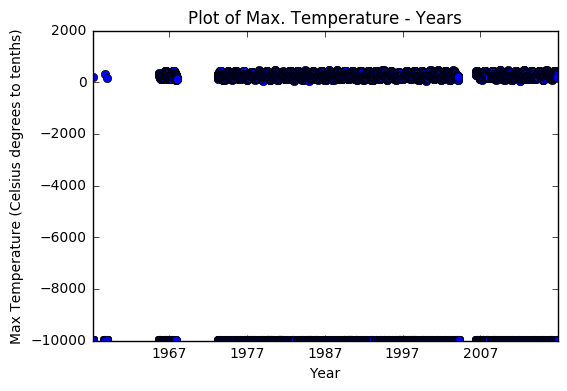

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Tmax_normal = []

for z in range(0,len(Tmax_final)):
    no_days = days_per_month[z]
    measurements = len(Tmax_final[z])
    diff = abs(measurements-no_days)              
    Tmax_normal.append(Tmax_final[z][:-diff or None])


Tmax_normal = np.concatenate( Tmax_normal, axis=0 )
len(Tmax_normal)

plt.plot_date(datetime_f,Tmax_normal)
plt.xlabel("Year")
plt.ylabel("Max Temperature (Celsius degrees to tenths)")
plt.title('Plot of Max. Temperature - Years')
plt.savefig('fig1.png', bbox_inches='tight')
plt.show()


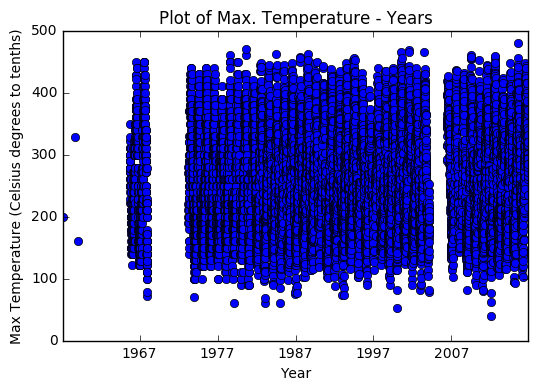

In [58]:
Tmax_no999 = []
for k in range(0,len(Tmax_normal)):
    if Tmax_normal[k] == '-9999' :
         Tmax_no999.append(float('nan'))
    else:
        Tmax_no999.append(Tmax_normal[k])


plt.plot_date(datetime_f,Tmax_no999)
plt.xlabel("Year")
plt.ylabel("Max Temperature (Celsius degrees to tenths)")
plt.title('Plot of Max. Temperature - Years')
plt.savefig('fig2.png', bbox_inches='tight')
plt.show()       


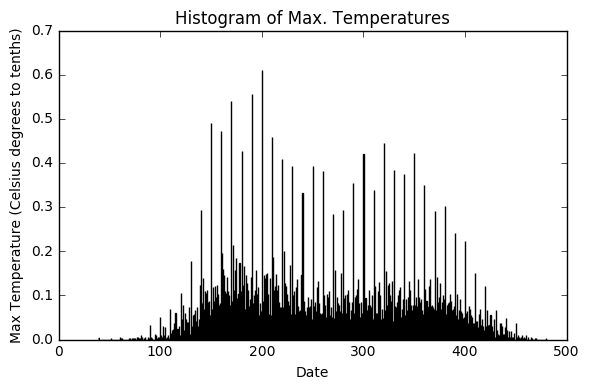

In [65]:
import scipy.stats as stats
#Tmax_no999 = np.asarray(Tmax_no999)

Tmax_no999 = [x for x in Tmax_no999 if str(x) != 'nan']
Tmax_no999

#date_strings = [datetime.strftime("%Y") for datetime in datetime_f]
#date_strings = [1957, 1967, 1977, 1987, 1997, 2007, 2016]

Tmax_no999 = list(map(int, Tmax_no999))

Tmax_no999 = np.asarray(Tmax_no999)

ax = plt.subplot(111)

#ax.set_xticklabels(date_strings,rotation=45, rotation_mode="anchor", ha="right")

plt.hist(Tmax_no999, bins=len(datetime_f), normed =True)

plt.xlabel("Date")
plt.ylabel("Max Temperature (Celsius degrees to tenths)")
plt.title('Histogram of Max. Temperatures')
plt.tight_layout()
plt.savefig('fig3.png', bbox_inches='tight')
plt.show()



